In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

DATA = '../DATA/ruas_count.shp'

In [3]:
%matplotlib inline

In [4]:
%matplotlib notebook

In [5]:
graph = gpd.read_file(DATA)
graph.head()

,osm_id,name,ref,type,oneway,bridge,maxspeed,length,NUMPOINTS,COUNT,geometry
0,29134586.0,Avenida Beira Mar,None,primary,1,0,None,27,0.0,3,LINESTRING (577532.3245794059 9720883.66956847...
1,29138030.0,None,None,primary_link,1,0,None,109,5.0,1,LINESTRING (578703.2024143914 9720770.18590053...
2,46218164.0,None,None,residential,1,0,None,141,0.0,1,LINESTRING (577734.7292404751 9719147.99763644...
3,46218166.0,None,None,residential,1,0,None,69,0.0,1,LINESTRING (577792.4842331782 9719270.78795546...
4,46218179.0,Rua das Cajazeiras,None,secondary,1,0,None,156,1.0,1,LINESTRING (577675.8305807926 9719706.85592203...


## Opcional: Apenas Testes

In [ ]:
graph['id'] = graph.index

In [ ]:
line = graph[['id','name','osm_id','geometry']].head()[:1]['geometry']

In [ ]:
print(line[0])

In [ ]:
graph[graph['NUMPOINTS'] > 0].describe()

# Gerando o grafo a partir do shapefile

In [6]:
G = nx.read_shp(DATA)
# first edges
first = G.edges()[0]
first

((577532.324579406, 9720883.669568479), (577506.5825641527, 9720874.740649855))

In [7]:
len(G.nodes())

865

## Gerando nodelist

In [8]:
# Nessa célula estou colocando o resultado de G.nodes() num dict
from itertools import count

node_list_dict = {pt: i for i, pt in zip(count(), G.nodes())}


In [9]:
node_list_dict

{(576960.0805039054, 9720550.430945825): 594,
 (576965.4783022071, 9720540.424169052): 45,
 (576971.1453270423, 9720576.645214569): 593,
 (576979.1258458331, 9720573.103670152): 438,
 (576984.9438877939, 9720600.636165623): 133,
 (576990.5625182077, 9720587.777329689): 134,
 (576997.9635598365, 9720394.073551115): 484,
 (577000.4551274616, 9720583.991576023): 135,
 (577001.6813883454, 9720360.96473575): 234,
 (577012.1346180976, 9720366.099283246): 233,
 (577017.7441474834, 9720586.2705418): 439,
 (577019.843141401, 9720311.233996341): 185,
 (577026.5529783554, 9720593.251993386): 149,
 (577026.8214954239, 9720586.23565564): 597,
 (577027.0902509666, 9720579.213083418): 440,
 (577029.7286822898, 9720252.609172627): 236,
 (577033.9887884958, 9720423.115383087): 46,
 (577034.4426880642, 9720586.206365349): 598,
 (577038.7225197719, 9720293.780649526): 183,
 (577039.4369867361, 9720340.936780725): 51,
 (577041.6833216622, 9720279.585687531): 186,
 (577045.6901663603, 9720350.528344242): 4

In [10]:
node_list_dict_inv = {k:v for v,k in node_list_dict.items()}

In [11]:
node_list_dict_inv

{0: (577532.324579406, 9720883.669568479),
 1: (577506.5825641527, 9720874.740649855),
 2: (578703.2024143914, 9720770.18590054),
 3: (578802.5053575705, 9720770.994002707),
 4: (577734.7292404751, 9719147.997636445),
 5: (577792.4842331782, 9719270.787955465),
 6: (577818.7652916844, 9719331.195183389),
 7: (577675.8305807926, 9719706.85592203),
 8: (577611.7495257395, 9719583.604684828),
 9: (577787.9736843831, 9719708.35399279),
 10: (577784.0048665652, 9719770.336204365),
 11: (577674.6665117489, 9719774.739466485),
 12: (578131.2535604687, 9719266.237859894),
 13: (578009.6194419647, 9719311.327099366),
 14: (577429.6493200228, 9720398.640043143),
 15: (577347.8932574416, 9720403.160769755),
 16: (577050.3839625426, 9720500.418551551),
 17: (577051.0994484967, 9720570.345993662),
 18: (577439.4520197856, 9720475.968869437),
 19: (577353.3936366836, 9720480.90089438),
 20: (577200.5687491548, 9720267.573439738),
 21: (577200.8084373905, 9720216.879491387),
 22: (577201.4892664825, 

## Pesos no Grafo

In [12]:
weighted_G = nx.Graph()

weighted_G.add_nodes_from(G.nodes(), weigth=0)
for data in G.edges(data=True):
   weighted_G.add_edge(data[0],data[1],weight=data[2]['length'])

In [13]:
# ndegrees = weighted_G.degree(G.nodes())
nweights = [np for np in graph.NUMPOINTS]

# ndegrees

In [14]:
weighted_G.nodes(data=True)

[((577532.324579406, 9720883.669568479), {'weigth': 0}),
 ((577506.5825641527, 9720874.740649855), {'weigth': 0}),
 ((578703.2024143914, 9720770.18590054), {'weigth': 0}),
 ((578802.5053575705, 9720770.994002707), {'weigth': 0}),
 ((577734.7292404751, 9719147.997636445), {'weigth': 0}),
 ((577792.4842331782, 9719270.787955465), {'weigth': 0}),
 ((577818.7652916844, 9719331.195183389), {'weigth': 0}),
 ((577675.8305807926, 9719706.85592203), {'weigth': 0}),
 ((577611.7495257395, 9719583.604684828), {'weigth': 0}),
 ((577787.9736843831, 9719708.35399279), {'weigth': 0}),
 ((577784.0048665652, 9719770.336204365), {'weigth': 0}),
 ((577674.6665117489, 9719774.739466485), {'weigth': 0}),
 ((578131.2535604687, 9719266.237859894), {'weigth': 0}),
 ((578009.6194419647, 9719311.327099366), {'weigth': 0}),
 ((577429.6493200228, 9720398.640043143), {'weigth': 0}),
 ((577347.8932574416, 9720403.160769755), {'weigth': 0}),
 ((577050.3839625426, 9720500.418551551), {'weigth': 0}),
 ((577051.09944849

In [15]:
node_list = []

In [16]:
for node, w_ in zip(weighted_G.nodes(data=True), nweights):
    node[1]['weigth'] += w_/2.0#ndegrees[node[0]]
    #print(node, w_)



In [17]:
weighted_G.nodes(data=True)[:10]

[((577532.324579406, 9720883.669568479), {'weigth': 0.0}),
 ((577506.5825641527, 9720874.740649855), {'weigth': 2.5}),
 ((578703.2024143914, 9720770.18590054), {'weigth': 0.0}),
 ((578802.5053575705, 9720770.994002707), {'weigth': 0.0}),
 ((577734.7292404751, 9719147.997636445), {'weigth': 0.5}),
 ((577792.4842331782, 9719270.787955465), {'weigth': 1.5}),
 ((577818.7652916844, 9719331.195183389), {'weigth': 1.5}),
 ((577675.8305807926, 9719706.85592203), {'weigth': 2.5}),
 ((577611.7495257395, 9719583.604684828), {'weigth': 1.0}),
 ((577787.9736843831, 9719708.35399279), {'weigth': 0.5})]

In [18]:
pos = {k:v for k,v in enumerate(weighted_G.nodes())}
pos

{0: (577532.324579406, 9720883.669568479),
 1: (577506.5825641527, 9720874.740649855),
 2: (578703.2024143914, 9720770.18590054),
 3: (578802.5053575705, 9720770.994002707),
 4: (577734.7292404751, 9719147.997636445),
 5: (577792.4842331782, 9719270.787955465),
 6: (577818.7652916844, 9719331.195183389),
 7: (577675.8305807926, 9719706.85592203),
 8: (577611.7495257395, 9719583.604684828),
 9: (577787.9736843831, 9719708.35399279),
 10: (577784.0048665652, 9719770.336204365),
 11: (577674.6665117489, 9719774.739466485),
 12: (578131.2535604687, 9719266.237859894),
 13: (578009.6194419647, 9719311.327099366),
 14: (577429.6493200228, 9720398.640043143),
 15: (577347.8932574416, 9720403.160769755),
 16: (577050.3839625426, 9720500.418551551),
 17: (577051.0994484967, 9720570.345993662),
 18: (577439.4520197856, 9720475.968869437),
 19: (577353.3936366836, 9720480.90089438),
 20: (577200.5687491548, 9720267.573439738),
 21: (577200.8084373905, 9720216.879491387),
 22: (577201.4892664825, 

<IPython.core.display.Javascript object>


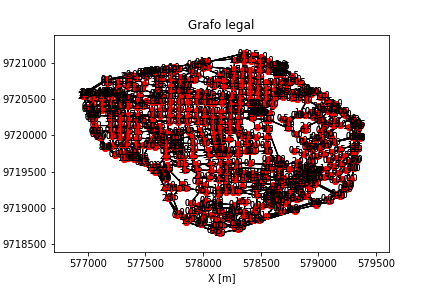

{(576960.0805039054,
  9720550.430945825): <matplotlib.text.Text at 0x7f96121b0be0>,
 (576965.4783022071,
  9720540.424169052): <matplotlib.text.Text at 0x7f96133a3a90>,
 (576971.1453270423,
  9720576.645214569): <matplotlib.text.Text at 0x7f96121b0668>,
 (576979.1258458331,
  9720573.103670152): <matplotlib.text.Text at 0x7f9612306940>,
 (576984.9438877939,
  9720600.636165623): <matplotlib.text.Text at 0x7f9613369160>,
 (576990.5625182077,
  9720587.777329689): <matplotlib.text.Text at 0x7f9613369ac8>,
 (576997.9635598365,
  9720394.073551115): <matplotlib.text.Text at 0x7f961228e8d0>,
 (577000.4551274616,
  9720583.991576023): <matplotlib.text.Text at 0x7f961336c198>,
 (577001.6813883454,
  9720360.96473575): <matplotlib.text.Text at 0x7f9613339908>,
 (577012.1346180976,
  9720366.099283246): <matplotlib.text.Text at 0x7f96133392e8>,
 (577017.7441474834,
  9720586.2705418): <matplotlib.text.Text at 0x7f9612306eb8>,
 (577019.843141401,
  9720311.233996341): <matplotlib.text.Text at 0

In [19]:
pos = {v:v for v in weighted_G.nodes()}

# labels = nx.get_edge_attributes(weighted_G,'weight')
labels = nx.get_node_attributes(weighted_G, 'weigth')


nx.draw_networkx_labels(weighted_G,pos,labels, font_size=8)
nx.draw_networkx_nodes(weighted_G,pos, node_size=30,node_color='r', label=labels)
nx.draw_networkx_edges(weighted_G, pos)

# nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
# plt.xlim(577000, 579500) #This changes and is problem specific
# plt.ylim(9718500, 9721000) #This changes and is problem specific
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Grafo legal')
#plt.savefig('graph.eps', format='eps', rasterized=False)


In [20]:
weighted_G.is_directed()

False

In [21]:
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)

In [22]:
gt_dict = nx.get_node_attributes(weighted_G, 'weigth')


# Get adjacency-matrix as numpy-array
adj_mat = nx.to_numpy_matrix(weighted_G, nodelist=node_list_dict)

# Cluster
sc = SpectralClustering(4, affinity='precomputed', n_init=100)
sc.fit(adj_mat)

# Compare ground-truth and clustering-results
print('spectral clustering')
print(sc.labels_)

SpectralClustering(affinity='precomputed', assign_labels='kmeans', coef0=1,
          degree=3, eigen_solver=None, eigen_tol=0.0, gamma=1.0,
          kernel_params=None, n_clusters=4, n_init=100, n_jobs=1,
          n_neighbors=10, random_state=None)

spectral clustering
[1 1 1 1 2 2 2 3 3 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 0 0 3 3 1 1
 3 1 1 3 3 3 3 3 3 3 0 0 3 3 3 2 2 1 1 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2
 2 2 2 2 2 2 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 0
 0 1 1 2 2 0 1 2 2 1 1 2 0 1 1 1 1 1 1 1 1 1 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 1 1 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 3 3 3 1 1 1 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 3 3 3 1 2 2 0 2 2 2 1 1 1
 1 1 3 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 2 0 0 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 1 1
 1 0 1 2 1 2 2 0 0 0 0 0 0 0 1 0 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2
 2 2 2 2 2 2 2 0 0 3 3 3 3 3 3 1 1 2 2 2 2 2 3 1 1 2 1 1 1 1 1 1 1 2 2 2 1
 2 2 2 3 3 3 3 3 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 3 1 1 3 3 3
 3 3 3 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3
 3 3 

## Desenhando os clusters:

In [56]:
colors = ['r', 'g', 'b', 'm']

In [68]:
nodes_cluster_dict = {}

for node in weighted_G.nodes():
    nodes_cluster_dict[node] = sc.labels_[node_list_dict[node]]

In [69]:
nodes_cluster_dict

{(576960.0805039054, 9720550.430945825): 3,
 (576965.4783022071, 9720540.424169052): 3,
 (576971.1453270423, 9720576.645214569): 1,
 (576979.1258458331, 9720573.103670152): 3,
 (576984.9438877939, 9720600.636165623): 3,
 (576990.5625182077, 9720587.777329689): 3,
 (576997.9635598365, 9720394.073551115): 3,
 (577000.4551274616, 9720583.991576023): 1,
 (577001.6813883454, 9720360.96473575): 3,
 (577012.1346180976, 9720366.099283246): 3,
 (577017.7441474834, 9720586.2705418): 1,
 (577019.843141401, 9720311.233996341): 3,
 (577026.5529783554, 9720593.251993386): 3,
 (577026.8214954239, 9720586.23565564): 1,
 (577027.0902509666, 9720579.213083418): 1,
 (577029.7286822898, 9720252.609172627): 3,
 (577033.9887884958, 9720423.115383087): 3,
 (577034.4426880642, 9720586.206365349): 3,
 (577038.7225197719, 9720293.780649526): 3,
 (577039.4369867361, 9720340.936780725): 3,
 (577041.6833216622, 9720279.585687531): 3,
 (577045.6901663603, 9720350.528344242): 3,
 (577047.0282271531, 9720295.47853541

In [86]:
# node_list_1 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 0}]
# node_list_2 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 1}]
# node_list_2 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 2}]
# node_list_2 = [node_list_dict[k] for k in {k:v for k,v in nodes_cluster_dict.items() if v == 3}]
node_list_1 = {k:v for k,v in nodes_cluster_dict.items() if v == 0}
node_list_2 = {k:v for k,v in nodes_cluster_dict.items() if v == 1}
node_list_3 = {k:v for k,v in nodes_cluster_dict.items() if v == 2}
node_list_4 = {k:v for k,v in nodes_cluster_dict.items() if v == 3}

In [87]:
node_list_2

{(576971.1453270423, 9720576.645214569): 1,
 (577000.4551274616, 9720583.991576023): 1,
 (577017.7441474834, 9720586.2705418): 1,
 (577026.8214954239, 9720586.23565564): 1,
 (577027.0902509666, 9720579.213083418): 1,
 (577138.9338872072, 9720601.85837632): 1,
 (577164.8379449233, 9720602.109835317): 1,
 (577284.4644023038, 9720500.967732022): 1,
 (577304.5928365748, 9720511.524618095): 1,
 (577344.6829276615, 9720491.086333353): 1,
 (577506.4770001408, 9720864.471499665): 1,
 (577506.5825641527, 9720874.740649855): 1,
 (577507.55199086, 9720837.36640753): 1,
 (577532.324579406, 9720883.669568479): 1,
 (577536.9910623424, 9720878.250583995): 1,
 (577546.4689885973, 9720888.945815666): 1,
 (577555.4279702693, 9720885.591634385): 1,
 (577580.8200467794, 9720057.165687576): 1,
 (577582.5694450032, 9720891.977364248): 1,
 (577586.4783308444, 9719499.04379369): 1,
 (577590.5900260792, 9720838.769938065): 1,
 (577599.1463295731, 9720768.74901775): 1,
 (577602.5316834584, 9720572.228365531): 1

<IPython.core.display.Javascript object>


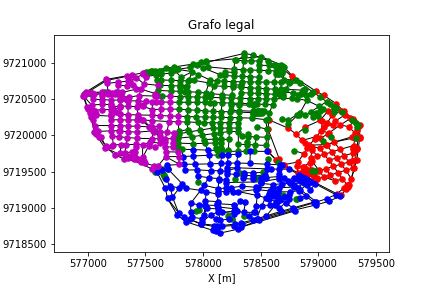

In [91]:


nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_1, node_size=30,node_color='r')
nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_2, node_size=30,node_color='g')
nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_3, node_size=30,node_color='b')
nx.draw_networkx_nodes(weighted_G, pos=pos, nodelist=node_list_4, node_size=30,node_color='m')
nx.draw_networkx_edges(weighted_G, pos)

# plt.xlim(577000, 579500) #This changes and is problem specific
# plt.ylim(9718500, 9721000) #This changes and is problem specific
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.title('Grafo legal')
plt.savefig('graph-c.eps', format='eps', rasterized=False)